**Creating ANN with Pytorch On Pima Diabetes Dataset**

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

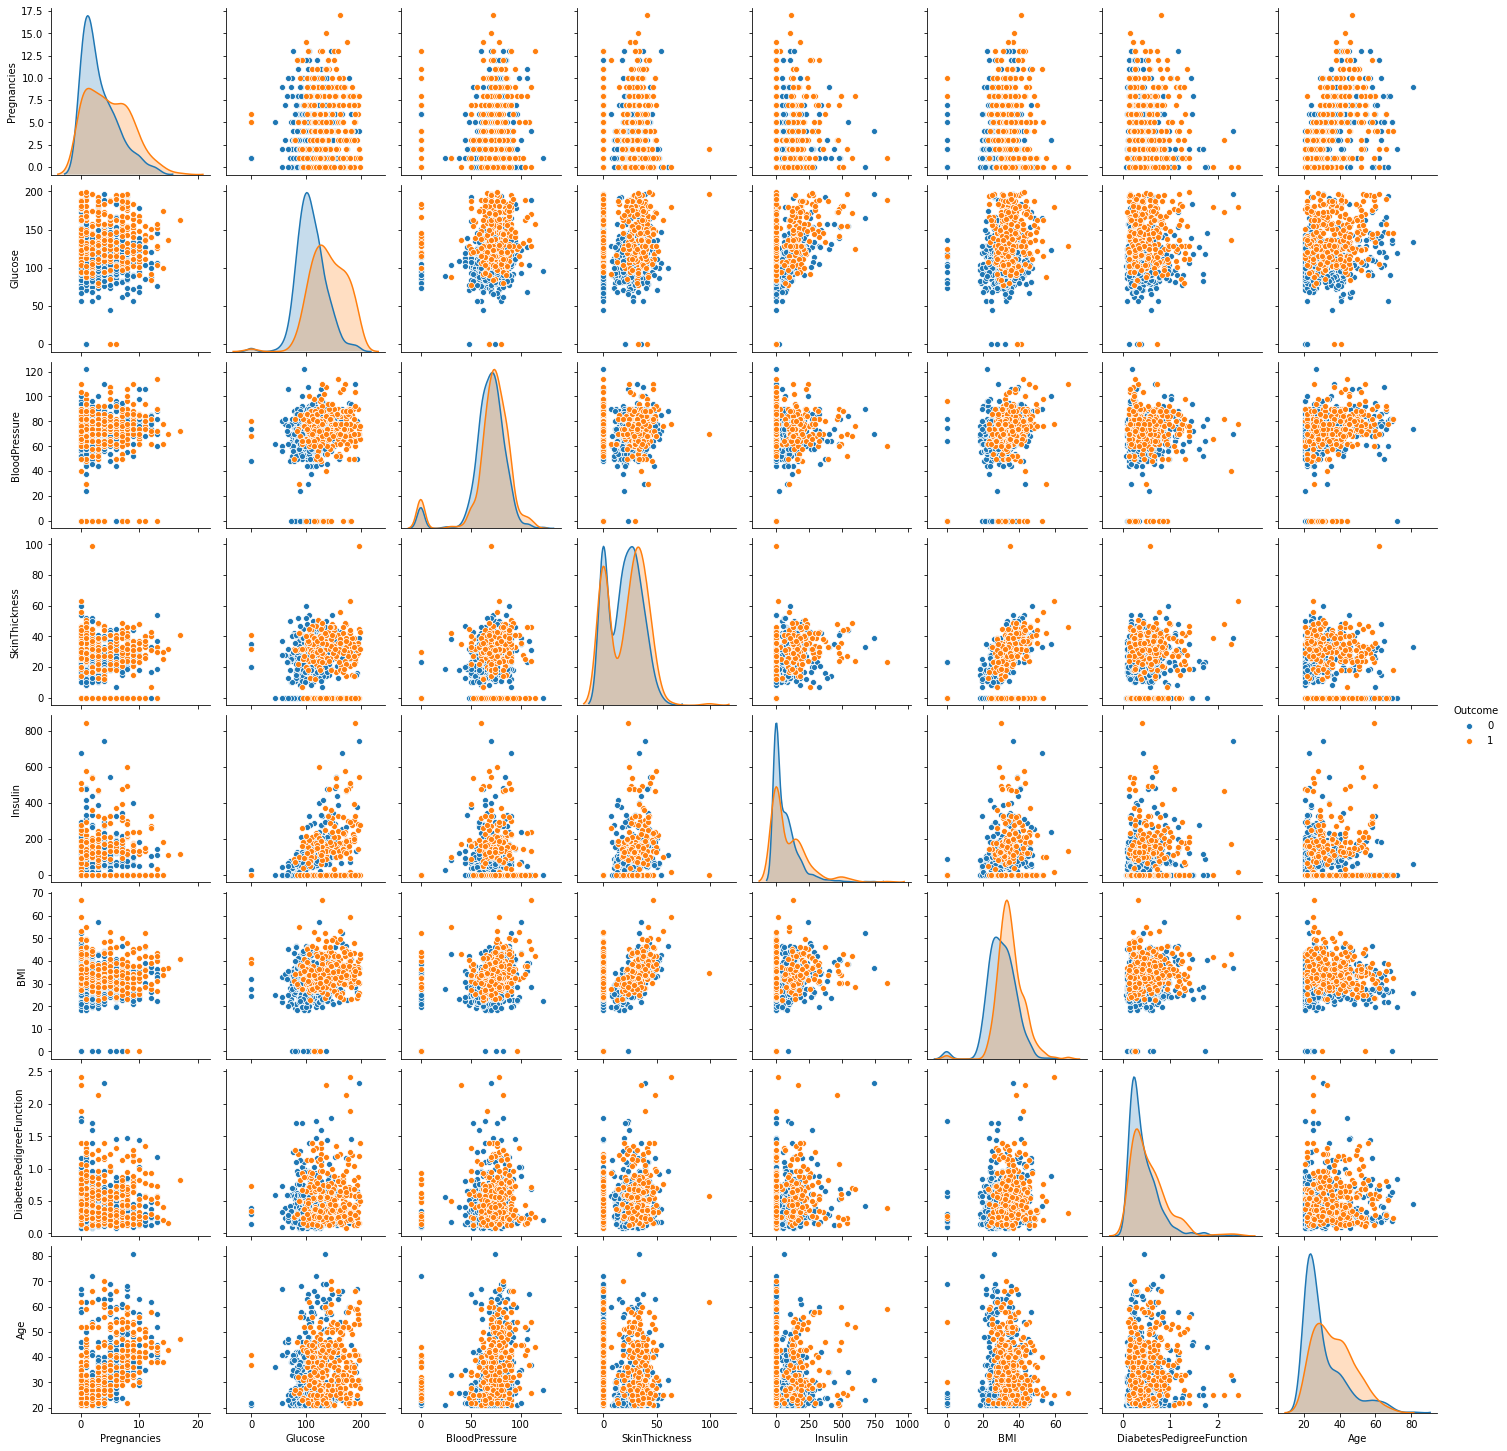

In [4]:
import seaborn as sns
sns.pairplot(df,hue='Outcome')

In [5]:
X = df.drop('Outcome',axis=1).values
y = df.Outcome.values

In [6]:

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

**Now First Step is to Create tensors**

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
X_train = torch.FloatTensor(X_train).cuda()
X_test = torch.FloatTensor(X_test).cuda()
y_train = torch.LongTensor(y_train).cuda()
y_test = torch.LongTensor(y_test).cuda()

# we have to create our independent variables in float tensor

**Creating Model with Pytorch**

In [9]:
class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__() # in this we are inheriting parent class i.e nn
        self.f_connected1 = nn.Linear(input_features,hidden1)
        self.f_connected2 = nn.Linear(hidden1,hidden2)
        self.out = nn.Linear(hidden2,out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

**Instantiate my ANN_Model**

In [10]:
torch.manual_seed(20) # this is used so that my initial weights get applied
model = ANN_Model()

In [11]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

**Till now we have done Forward Propagation,now for Backward Propagation we need to define**

**1.Loss function**

**2.Optimizer**

In [12]:
model = model.cuda()
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr = 0.01)

In [13]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019209504127502
Epoch number: 21 and the loss : 0.6090320348739624
Epoch number: 31 and the loss : 0.5917771458625793
Epoch number: 41 and the loss : 0.5679706931114197
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310389995574951
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135971903800964
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.498340904712677
Epoch number: 121 and the loss : 0.4960552155971527
Epoch number: 131 and the loss : 0.48286372423171997
Epoch number: 141 and the loss : 0.4756036400794983
Epoch number: 151 and the loss : 0.48334604501724243
Epoch number: 161 and the loss : 0.4882744550704956
Epoch number: 171 and the loss : 0.4705786108970642
Epoch number: 181 and the loss : 0.4763614535331726
Epoch number: 191 and t

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

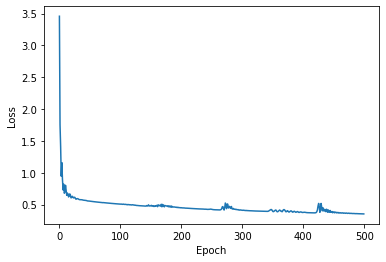

In [15]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [23]:
predictions = []
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred = model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
1
0
0
0
1
0
0
1
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [22]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

Text(69.0, 0.5, 'Predicted Values')

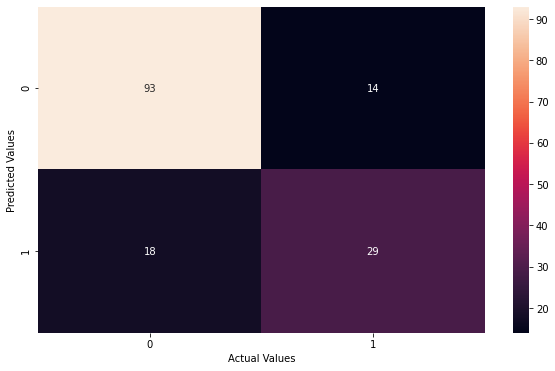

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [24]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,predictions)
score

0.7922077922077922

**Save the Model**

In [25]:
torch.save(model,'diabetes.pt')

**Load The Model**

In [26]:
model = torch.load('diabetes.pt')

In [27]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

**Prediction of New Data Point**

In [28]:
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [29]:
l1 = [6.0, 150.0, 71.0, 30.0, 0.0, 38.6, 0.720, 45.0]

In [30]:
data_point = torch.tensor(l1)

In [31]:
with torch.no_grad():
    print(model(data_point))
    print(model(data_point).argmax().item())

tensor([0.3950, 3.4568])
1
